# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**

- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks

1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [92]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [93]:

class StandardScalerManual:
    def fit(self, x):
        self.mean = np.mean(x, axis=0)
        self.std = np.std(x, axis=0)

        self.std[self.std == 0] = 1 

        return (x-self.mean) / self.std
    
    def transform(self, x):
        return (x - self.mean) / self.std
        
    
    def fit_transform(self, x):
        
        self.mean = np.mean(x, axis=0)
        self.std = np.std(x, axis=0)
        self.std[self.std == 0] = 1.0 
        
        
        scaled_data = (x - self.mean) / self.std
        return scaled_data


In [94]:

class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.loss_history = []

        

    def fit(self, x, y):
        m , n = x.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for epoch in range(self.epochs):
            y_pred = np.dot(x, self.weights) + self.bias

            
            dw = (1/m) * np.dot(x.T, (y_pred - y))
            db = (1/m) * np.sum(y_pred - y)

            # Update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            
            loss = (1/(2*m)) * np.sum((y_pred - y) ** 2) + (self.l2_lambda/(2*m)) * np.sum(self.weights ** 2)
            self.loss_history.append(loss)
        

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


In [95]:

class RidgeRegressionGD:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=1.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.loss_history = []

        

    def fit(self, x, y):
        m , n = x.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for epoch in range(self.epochs):
            y_pred = np.dot(x, self.weights) + self.bias

           
            dw = (1/m) * np.dot(x.T, (y_pred - y)) + (self.l2_lambda/m) * self.weights
            db = (1/m) * np.sum(y_pred - y)

            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            
            loss = (1/(2*m)) * np.sum((y_pred - y) ** 2) + (self.l2_lambda/(2*m)) * np.sum(self.weights ** 2)
            self.loss_history.append(loss)
        

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


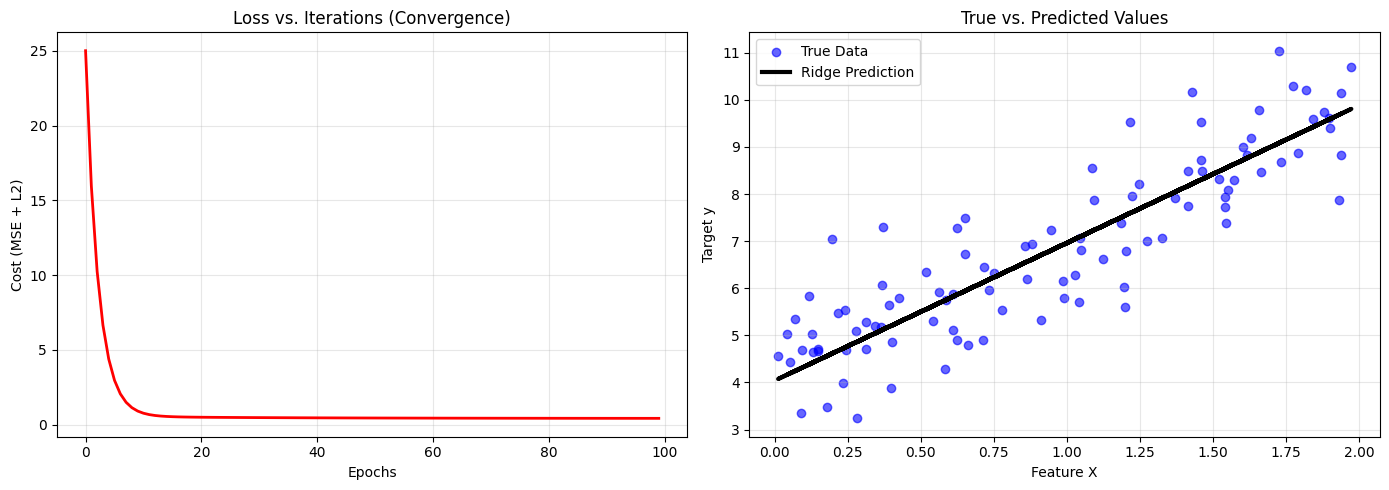

In [96]:

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
y = y.flatten()


model = RidgeRegressionGD(lr=0.1, epochs=100, l2_lambda=0.1)
model.fit(X, y)
predictions = model.predict(X)


plt.figure(figsize=(14, 5))


plt.subplot(1, 2, 1)
plt.plot(model.loss_history, color='red', lw=2)
plt.title("Loss vs. Iterations (Convergence)")
plt.xlabel("Epochs")
plt.ylabel("Cost (MSE + L2)")
plt.grid(alpha=0.3)


plt.subplot(1, 2, 2)
plt.scatter(X, y, color='blue', label='True Data', alpha=0.6)
plt.plot(X, predictions, color='black', label='Ridge Prediction', lw=3)
plt.title("True vs. Predicted Values")
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks

1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [97]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.1):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.loss_history = []

    def _sigmoid(self, z):
        
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
       
        self.weights = np.zeros(n)
        self.bias = 0
        
        for i in range(self.epochs):
            
            z = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(z)
            
            
            eps = 1e-15 
            loss = -(1/m) * np.sum(y * np.log(y_pred + eps) + (1 - y) * np.log(1 - y_pred + eps))
            l2_penalty = (self.l2_lambda / (2 * m)) * np.sum(self.weights**2)
            self.loss_history.append(loss + l2_penalty)
            
           
            dw = (1/m) * (np.dot(X.T, (y_pred - y)) + self.l2_lambda * self.weights)
            db = (1/m) * np.sum(y_pred - y)
            
           
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict_proba(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self._sigmoid(z)

    def predict(self, X, threshold=0.5):
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)


def calculate_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

--- Model Report ---
Final Training Loss: 0.0178
Final Accuracy:      99.50%


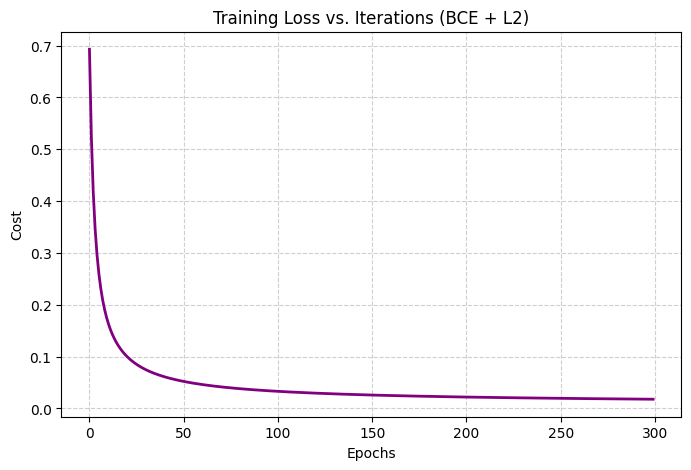

In [98]:

np.random.seed(42)
num_samples = 200
X1 = np.random.randn(num_samples // 2, 2) + [2, 2] 
X0 = np.random.randn(num_samples // 2, 2) + [-2, -2] 
X = np.vstack((X1, X0))
y = np.array([1]*100 + [0]*100)


indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X, y = X[indices], y[indices]


model = LogisticRegressionManual(lr=0.1, epochs=300, l2_lambda=0.1)
model.fit(X, y)


y_pred = model.predict(X)
accuracy = calculate_accuracy(y, y_pred)
print(f"--- Model Report ---")
print(f"Final Training Loss: {model.loss_history[-1]:.4f}")
print(f"Final Accuracy:      {accuracy * 100:.2f}%")


plt.figure(figsize=(8, 5))
plt.plot(model.loss_history, color='purple', linewidth=2)
plt.title("Training Loss vs. Iterations (BCE + L2)")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks

Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [99]:

def kmeans_matrix(M, k, max_iters=100):
    
    n, m = M.shape
   
    elements = M.flatten().reshape(-1, 1)
    
   
    random_indices = np.random.choice(len(elements), k, replace=False)
    centroids = elements[random_indices].flatten()
    
    assignment_flattened = np.zeros(len(elements), dtype=int)
    
    for _ in range(max_iters):
        distances = np.abs(elements - centroids)
        new_assignments = np.argmin(distances, axis=1)
        
        if np.array_equal(new_assignments, assignment_flattened):
            break
        assignment_flattened = new_assignments

        for i in range(k):
            cluster_elements = elements[assignment_flattened == i]
            if len(cluster_elements) > 0:
                centroids[i] = np.mean(cluster_elements)
    
 
    assignment_table = assignment_flattened.reshape(n, m)
    
   
    cookbook = {i: [] for i in range(k)}
    for r in range(n):
        for c in range(m):
            label = assignment_table[r, c]
            cookbook[label].append((r, c))
            
    return assignment_table, cookbook, centroids


In [100]:
M = np.array([
    [10, 12, 80],
    [15, 90, 85],
    [95, 11, 14]
])

k = 2
table, book, centers = kmeans_matrix(M, k)

print("Original Matrix:\n", M)
print("\nCluster Assignment Table:\n", table)
print("\nCentroids:", centers)
print("\nCookbook (Positions for Cluster 0):", book[0])

Original Matrix:
 [[10 12 80]
 [15 90 85]
 [95 11 14]]

Cluster Assignment Table:
 [[0 0 1]
 [0 1 1]
 [1 0 0]]

Centroids: [12 87]

Cookbook (Positions for Cluster 0): [(0, 0), (0, 1), (1, 0), (2, 1), (2, 2)]


## Submission Guidelines

- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**

- Compare convergence with and without standardization.
- Try different values of regularization strength.


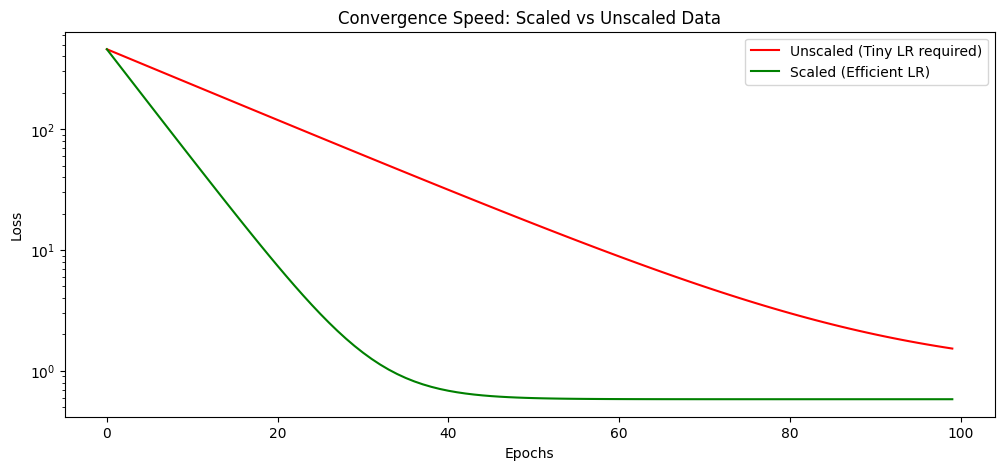

In [101]:

np.random.seed(42)
X = np.hstack([np.random.rand(100, 1), np.random.rand(100, 1) * 1000])
y = 3 * X[:, 0] + 0.05 * X[:, 1] + np.random.randn(100)


model_unscaled = RidgeRegressionGD(lr=1e-7, epochs=100, l2_lambda=0.1)
model_unscaled.fit(X, y)


scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)
model_scaled = RidgeRegressionGD(lr=0.1, epochs=100, l2_lambda=0.1)
model_scaled.fit(X_scaled, y)


plt.figure(figsize=(12, 5))
plt.plot(model_unscaled.loss_history, label='Unscaled (Tiny LR required)', color='red')
plt.plot(model_scaled.loss_history, label='Scaled (Efficient LR)', color='green')
plt.title("Convergence Speed: Scaled vs Unscaled Data")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.yscale('log')
plt.show()

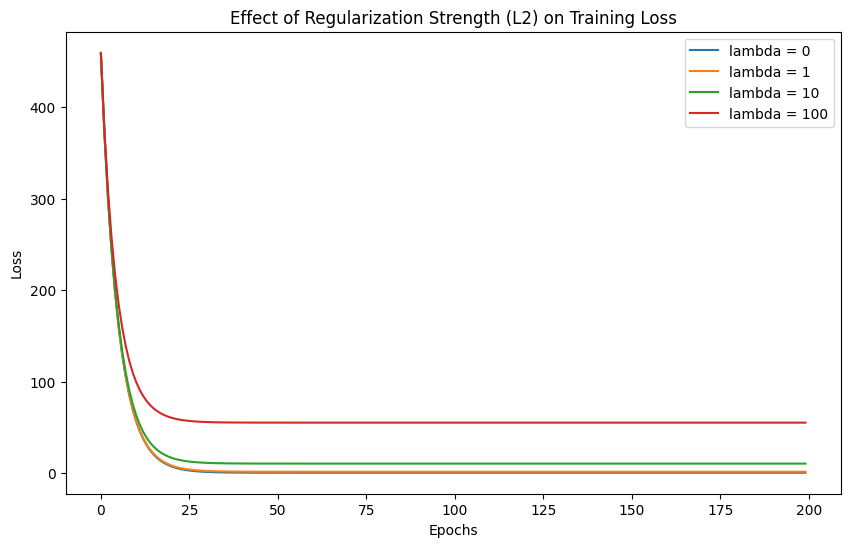

In [103]:
lambdas = [0, 1, 10, 100]
plt.figure(figsize=(10, 6))

for l in lambdas:
    model = RidgeRegressionGD(lr=0.1, epochs=200, l2_lambda=l)
    model.fit(X_scaled, y)
    plt.plot(model.loss_history, label=f'lambda = {l}')

plt.title("Effect of Regularization Strength (L2) on Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
